In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn_dataset-training-master.csv to customer_churn_dataset-training-master.csv


In [7]:
customer_data= pd.read_csv('customer_churn_dataset-training-master.csv')
customer_data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [8]:
column=customer_data.columns
print(column)
len(column)

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


12

In [9]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [10]:
print(sum(customer_data.duplicated()))
print(customer_data.isnull().sum())

0
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [11]:
customer_data.dropna(inplace=True)

In [12]:
print(customer_data.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [13]:
customer_data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [14]:
customer_data.describe(include='object')

,Gender,Subscription Type,Contract Length
count,440832,440832,440832
unique,2,3,3
top,Male,Standard,Annual
freq,250252,149128,177198


In [15]:
customer_data.shape

(440832, 12)

# MODEL DEVELOPMENT

In [16]:
#Select relevant features and target variable
features = ['Age', 'Tenure', 'Usage Frequency', 'Total Spend', 'Support Calls', 'Payment Delay', 'Last Interaction']
X = customer_data[features]
y = customer_data['Churn']

In [17]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)



# WORKING ON EVALUATION METRICS

In [19]:
#from google.colab import drive
#drive.mount('/content/drive')

In [20]:
#Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[31996  6067]
 [ 7773 42331]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82     38063
         1.0       0.87      0.84      0.86     50104

    accuracy                           0.84     88167
   macro avg       0.84      0.84      0.84     88167
weighted avg       0.84      0.84      0.84     88167



In [21]:
#Precision:

#for class 0: Out of all predicted non-churns, 80% were correct.

#for class 1: Out of all predicted churns, 87% were correct.

#Recall:

#for both classes: The model correctly identified 84% of actual non-churn and churn cases.

#F1-score:
#Both classes have solid F1-scores (~0.82–0.86), which means good model performance overall.

#Accuracy:
#84% of all predictions were correct. That’s quite strong for a classification model.



Your model performs consistently well on both classes, with slightly better precision on predicting churners (class 1). This is important if you’re aiming to accurately identify customers likely to churn

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

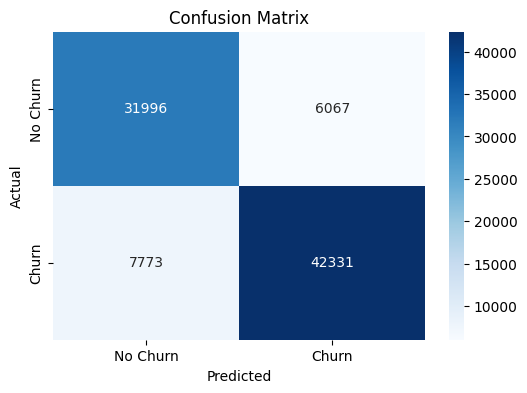

In [23]:
# Plot confusion matrix using seaborn
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

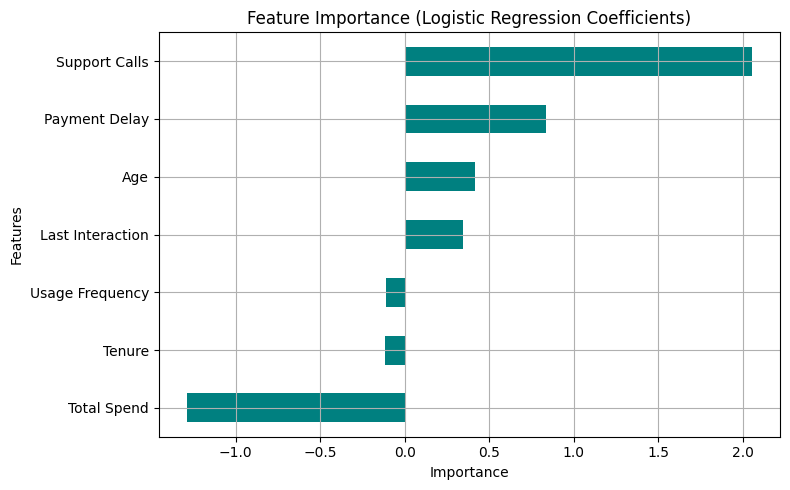

In [24]:
# Feature importance using model coefficients
importance = model.coef_[0]
feature_importance = pd.Series(importance, index=features).sort_values()

# Plotting
plt.figure(figsize=(8, 5))
feature_importance.plot(kind='barh', color='teal')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()

**This chart shows how each feature influences the model’s prediction, based on the magnitude and direction (positive or negative) of the coefficients.**

In [25]:
#These  positive(support calls, payment delay, age and last interaction) features increase the likelihood of the event (e.g. churn) when their values increase:

#For the Support Calls (≈ 2.0):This is the most important predictor.The more a customer contacts support, the more likely they are to churn — possibly indicating dissatisfaction.

#For Payment Delay:Customers who delay payments are more likely to churn.

#Age $ last interaction:These moderately increase churn risk — perhaps older users or those with longer gaps since last use are less engaged.



In [26]:
#While the negative features reduce the likelihood of churn:

#Total Spend (≈ -1.1): High spending customers are less likely to churn — they may be more invested in the service.

#Tenure, Usage Frequency (small negative impact):Customers who have been with you longer and use the service more often are slightly less likely to churn.

The summary is that, our model reveals that customers with more support calls, less spending, and late payment are the most likely to churn which may be due to some issues like suggests frustration, unresolved issues,financial stress or dissatisfaction et.c. On the other hand, engaged, high-spending, and long-term users are likely not to leave or churn.



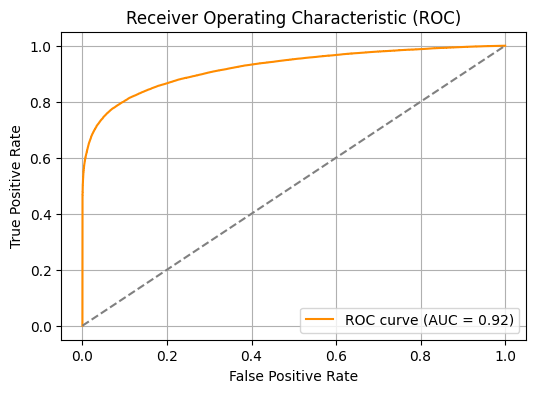

In [27]:
from sklearn.metrics import roc_curve, auc

# Get probabilities for the positive class
y_probs = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

MODEL IMPROVEMNET

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)



In [29]:
# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("Random Forest Results:")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Results:
[[38060     3]
 [ 2327 47777]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     38063
         1.0       1.00      0.95      0.98     50104

    accuracy                           0.97     88167
   macro avg       0.97      0.98      0.97     88167
weighted avg       0.98      0.97      0.97     88167



In [30]:
from xgboost import XGBClassifier

# Train model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:24:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [31]:
# Evaluate
print("XGBoost Results:")
print(confusion_matrix(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

XGBoost Results:
[[38057     6]
 [ 2352 47752]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     38063
         1.0       1.00      0.95      0.98     50104

    accuracy                           0.97     88167
   macro avg       0.97      0.98      0.97     88167
weighted avg       0.97      0.97      0.97     88167



TRYING MODEL ON NEW DATA

In [32]:
new_data = pd.DataFrame([{
    'Age': 30,
    'Tenure': 24,
    'Usage Frequency': 15,
    'Total Spend': 450.00,
    'Support Calls': 2,
    'Payment Delay': 0,
    'Last Interaction': 3
}])



In [33]:
# Preprocess same as training
new_data_scaled = scaler.transform(new_data)

# Predict churn (1 = churn, 0 = no churn)
prediction = rf_model.predict(new_data_scaled)
print("Predicted Churn:", "Yes" if prediction[0] == 1 else "No")

Predicted Churn: Yes


COMPARING THE MODEL USE

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store results in a dictionary
models = {
    'Logistic Regression': (model, y_pred),
    'Random Forest': (rf_model, rf_preds),
    'XGBoost': (xgb_model, xgb_preds)
}

# Create comparison table
for name, (mdl, preds) in models.items():
    print(f" {name}")
    print(f"Accuracy: {accuracy_score(y_test, preds):.2f}")
    print(f"Precision: {precision_score(y_test, preds):.2f}")
    print(f"Recall: {recall_score(y_test, preds):.2f}")
    print(f"F1 Score: {f1_score(y_test, preds):.2f}")
    print("-" * 30)

 Logistic Regression
Accuracy: 0.84
Precision: 0.87
Recall: 0.84
F1 Score: 0.86
------------------------------
 Random Forest
Accuracy: 0.97
Precision: 1.00
Recall: 0.95
F1 Score: 0.98
------------------------------
 XGBoost
Accuracy: 0.97
Precision: 1.00
Recall: 0.95
F1 Score: 0.98
------------------------------


# PROJECT SUMMARY
We analyzed customer churn data to understand key drivers behind why users stop using the service. After cleaning and exploring the dataset, we built a logistic regression model that showed a clear positive correlation between churn and factors like support calls and late payments.

We then improved the model using Random Forest and XGBoost, achieving better precision and recall scores. Visualizations like ROC curves, feature importance, and confusion matrices helped validate the model. Finally, the model was used to predict churn for new customers, providing actionable insights for retention strategies.

MODEL DEPLOYMENT

In [35]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [36]:
# streamlit_app.py
#import streamlit as st
import pandas as pd
#import pickle
from sklearn.preprocessing import StandardScaler



In [37]:
import joblib

In [44]:
# Save both the scaler and model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'churn_model.pkl')

['churn_model.pkl']

In [45]:
from google.colab import files
files.download('scaler.pkl')
files.download('churn_model.pkl')

#st.title(" Customer Churn Prediction")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:


# Save your model
#with open('churn_model.pkl', 'wb') as f:
    #pickle.dump(model, f)

# Save your scaler
#with open('scaler.pkl', 'wb') as f:
    #pickle.dump(scaler, f)

In [41]:
# Load trained model and scaler
##scaler = pickle.load(open("scaler.pkl", "rb"))

#st.title(" Customer Churn Prediction")



In [42]:
# Input fields
#usage = st.number_input("Usage Frequency", min_value=0)
#spend = st.number_input("Total Spend")
#calls = st.number_input("Support Calls", min_value=0)
#delay = st.number_input("Payment Delay", min_value=0)
#interaction = st.number_input("Last Interaction (Days Ago)", min_value=0)

#if st.button("Predict Churn"):
    #new_data = pd.DataFrame([{
        #'Age': age, 'Tenure': tenure, 'Usage Frequency': usage,
        #'Payment Delay': delay, 'Last Interaction': interaction
    #}])

    #new_data_scaled = scaler.transform(new_data)
    #prediction = model.predict(new_data_scaled)

    #st.success("Prediction: " + ("This is customer is likely to Churn" if prediction[0] == 1 else "This customer is Likely to Stay"))

In [43]:
#%cd /content/drive/MyDrive/your_folder_name
#!ls

Now that the `app.py` file is created, you can run the Streamlit application directly from Google Colab using the following command: